In [1]:
import numpy as np
import pandas as pd
import os
import pickle
from pathlib import Path

In [2]:
df = pd.read_csv('token_surprisals_sentence_file_Original_bypassages.txt', sep='\t')
df.head()

,sentence_id,token_id,token,surprisal
0,1,1,<|endoftext|>,0.000000
1,1,2,Ġbee,23.629046
2,1,3,keeping,4.228593
3,1,4,Ġencourages,14.358519
4,1,5,Ġthe,2.697638


In [3]:
def undo_subword_tokenization(df):
    """
    Takes in old DF and returns new DF with tokens remerged and according surprisal values averaged
    """
    
    overall_sentence_ids = []
    overall_token_ids = []
    overall_tokens = []
    overall_surprisals = []
    
    
    
    sentence_ids = np.unique(df['sentence_id'])
    for ind, elm in enumerate(sentence_ids):
        curr_df = df[df['sentence_id'] == elm]
        
        tokens = list(curr_df['token'])
        surprisal = list(curr_df['surprisal'])
        token_surp = list(zip(tokens, surprisal))
        
        sent = ' '.join(tokens)
        #print(sent)
        
        #get start indices of words
        new_word_indices = [ind for ind in range(len(tokens)) if tokens[ind].startswith('Ġ')]# out since I stripped <eos> already  or ind == 1]
        new_word_indices = new_word_indices #out since I stripped <eos> already [0] + new_word_indices
        #print([tokens[i] for i in new_word_indices])
        
        #find out how many tokens to merge with each word/beginning
        how_many_to_merge = []
        for i, word_index in enumerate(new_word_indices):
            start_merge = word_index
            if i != len(new_word_indices)-1:
                end_merge = new_word_indices[i+1]
                nr_to_merge = end_merge - start_merge -1
            else:
                nr_to_merge = len(tokens) - new_word_indices[-1] -1 #CK
            how_many_to_merge.append(nr_to_merge)
        
        TOMERGE = list(zip(new_word_indices, how_many_to_merge))
        #print(TOMERGE)
        #print("*"*30)
        #merge tokens, average surprisals
        new_tokens = []
        new_surp = []
        
        for lauf1, (tok, surp) in enumerate(token_surp):
            #print((tok, surp))
            for lauf2, (beginning, nr_merge) in enumerate(TOMERGE):
                if lauf1 == beginning:
                    #print((tok, surp))
                    #print(nr_merge)
                    if nr_merge == 0:
                        new_tokens.append(tok)
                        new_surp.append(surp)
                    else:
                        toks = [tok]
                        surps = [surp]
                        for i in range(1,nr_merge+1):
                            #print(token_surp[lauf1+i][0])
                            toks.append(token_surp[lauf1+i][0])
                            surps.append(token_surp[lauf1+i][1])
                        if nr_merge >= 2:
                            print(elm)
                            print(toks)
                            print(''.join(toks))
                            print(surps)
                            print(np.mean(surps))
                        new_tokens.append(''.join(toks))
                        if surps[0] == 0.0: #ignore initial 0
                            surps = surps[1:]
                        new_surp.append(np.mean(surps))
#                         if nr_merge >= 2:
#                             print(np.mean(surps))
        
        
        new_tokens = [elm.lstrip('Ġ') for elm in new_tokens]
        
        test =  " ".join(new_tokens)
        #print("NEW SENTENCE:", test)
        #print("*"*30)
        
        new_tokenids = list(range(1, len(new_surp) + 1))
        new_sentenceids = np.array([[ind + 1]*len(new_surp)]).flatten()
        if ind%10 == 0:
            print('\n')  
            print(new_tokens)
            print(new_surp)
            print(new_sentenceids)
            print(new_tokenids)
            assert len(new_tokenids) == len(new_surp)
            print('\n') 
    
        overall_sentence_ids.append(new_sentenceids)
        overall_token_ids.append(new_tokenids)
        overall_tokens.append(new_tokens)
        overall_surprisals.append(new_surp)
        
    #print(len(overall_sentence_ids), len(overall_sentence_ids[0]))
            
#     #create new DATAFRAME!
#     # initialize list of lists
#     overall_sentence_ids = np.array(overall_sentence_ids).flatten().flatten()
#     overall_token_ids = np.array(overall_token_ids).flatten().flatten()
#     overall_tokens = np.array(overall_tokens).flatten().flatten()
#     overall_surprisals = np.array(overall_surprisals).flatten().flatten()
    
    data = [[overall_sentence_ids[i][j], overall_token_ids[i][j], overall_tokens[i][j], overall_surprisals[i][j]] for i in range(len(overall_surprisals)) for j in range(len(overall_surprisals[i])) ]

    # Create the pandas DataFrame  
    new_df = pd.DataFrame(data, columns = ['sentence_id', 'token_id', 'token', 'surprisal'])  

    # print dataframe.  
    return new_df 

new_df = undo_subword_tokenization(df)

1
['Ġbee', 'keeper', "'s"]
Ġbeekeeper's
[4.958197, 0.545384, 0.02419]
1.8425903333333336
1
['Ġhoney', 'bees', '.']
Ġhoneybees.
[6.597658, 2.391222, 1.9442259999999998]
3.644368666666667


['beekeeping', 'encourages', 'the', 'conservation', 'of', 'local', 'habitats.', 'it', 'is', 'in', 'every', "beekeeper's", 'interest', 'to', 'conserve', 'local', 'plants', 'that', 'produce', 'pollen.', 'as', 'a', 'passive', 'form', 'of', 'agriculture', 'it', 'does', 'not', 'require', 'that', 'native', 'vegetation', 'be', 'cleared', 'to', 'make', 'way', 'for', 'crops.', 'beekeepers', 'also', 'discourage', 'the', 'use', 'of', 'pesticides', 'on', 'crops', 'because', 'they', 'could', 'kill', 'the', 'honeybees.']
[13.9288195, 14.358519, 2.697638, 6.2564910000000005, 0.198918, 6.894665, 3.3546674999999997, 14.600189000000002, 1.7024549999999998, 6.870191999999999, 8.397111, 1.8425903333333336, 0.401429, 0.292653, 4.701908, 3.905729, 6.554962, 5.634440000000001, 7.4760860000000005, 4.4268374999999995, 8.86607

64
['Ġentrance', 'way', '.']
Ġentranceway.
[13.680601000000001, 4.755198, 1.495729]
6.643842666666668
65
['Ġgle', 'amed', '.']
Ġgleamed.
[11.659728999999999, 0.137461, 3.7360300000000004]
5.17774
66
['Ġz', 'ig', 'z', 'agged']
Ġzigzagged
[16.13716, 0.64347, 1.554676, 0.227613]
4.640729750000001
67
['Ġbould', 'ers', '.']
Ġboulders.
[1.093961, 0.079328, 2.656431]
1.2765733333333333
69
['Ġfree', '-', 'cl', 'im', 'bing']
Ġfree-climbing
[17.812615, 4.567978, 9.573212, 1.784089, 0.11201099999999999]
6.769981000000001
70
['Ġhes', 'it', 'antly']
Ġhesitantly
[16.986887, 10.742807, 0.855366]
9.528353333333333


['a', 'major', 'strength', 'of', 'professional', 'skiers', 'is', 'how', 'they', 'use', 'ski', 'poles.', 'proper', 'use', 'of', 'ski', 'poles', 'improves', 'their', 'balance', 'and', 'adds', 'flair', 'to', 'their', 'skiing.', 'it', 'minimizes', 'the', 'need', 'for', 'upper', 'body', 'movements', 'to', 'regain', 'lost', 'balance', 'while', 'skiing.']
[12.015897, 11.183817, 9.098372999999999,

123
['Ġl', 'ibr', 'arians']
Ġlibrarians
[9.395088000000001, 1.080925, 0.3641]
3.6133710000000008
124
['Ġeuro', 'pe', 'an']
Ġeuropean
[18.411373, 0.140681, 0.779431]
6.443828333333333
125
['Ġvir', 'ility', '.']
Ġvirility.
[8.754850999999999, 0.046548, 0.7686470000000001]
3.1900153333333328
126
['Ġcoc', 'on', 'uts']
Ġcoconuts
[10.315036, 0.380984, 0.0008210000000000001]
3.5656136666666662
127
['Ġhigh', '-', 'p', 'itched']
Ġhigh-pitched
[4.682372, 1.4880200000000001, 0.69208, 0.042226]
1.7261745
128
['Ġt', 'ect', 'onic']
Ġtectonic
[10.634188, 0.46551800000000004, 0.190411]
3.763372333333333
128
['Ġmount', 'aine', 'ers']
Ġmountaineers
[10.88592, 1.0327790000000001, 1.853407]
4.590702
131
['Ġself', '-', 'defense']
Ġself-defense
[3.4831489999999996, 1.00179, 0.045768]
1.5102356666666665


['murder', 'is', 'the', 'unlawful', 'killing', 'of', 'another', 'human', 'being', 'with', 'intent.', 'murder', 'a', 'serious', 'crime', 'because', 'it', 'deprives', 'the', 'victim', 'of', 'their', 'existenc

In [4]:
def prepare_datasets(textfile):
    df = pd.read_csv(textfile, sep='\t')
    
    # Delete final periods and "'s" from dataframe before merging.
    # This is hacky but does work here when we're only interested in comparing NOUN probability
    # If we don't apply this hack, then "beekeeper" (noun_df) and "beekeeper's" (original_df) probabilities are not
    # matched (since we average across 3 tokens in the latter), and also they are not found to be the same word further
    # below
    df = df[df.token != "."]
    print(len(df))
    df = df[~df['token'].str.contains("'")]
    print(len(df))
    df = df[df.token != "<|endoftext|>"]
    print(len(df))
    
    new_df = undo_subword_tokenization(df)
    return new_df

In [5]:
noun_df = prepare_datasets('token_surprisals_sentence_file_nouns_bypassages.txt')

3254
3254
3086


['beekeeping', 'conservation', 'habitats', 'it', 'beekeeper', 'interest', 'plants', 'pollen', 'form', 'agriculture', 'it', 'vegetation', 'way', 'crops', 'beekeepers', 'use', 'pesticides', 'crops', 'they', 'honeybees']
[13.9288195, 10.74717, 14.792244, 13.992409, 7.441282, 12.251241, 15.106214000000001, 14.665979, 13.841736, 10.693164999999999, 10.893649, 11.715129, 12.805541999999999, 7.689635000000001, 4.1360075, 6.484415, 4.982631, 12.138794, 7.9988399999999995, 5.792535000000001]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


2
['Ġmic', 'roman', 'agers']
Ġmicromanagers
[13.701522, 0.272408, 7.595674000000001]
7.189868000000001
9
['Ġlot', 'ter', 'ies']
Ġlotteries
[15.010869, 0.26664699999999997, 0.010304]
5.09594
11
['Ġmud', 'sl', 'ides']
Ġmudslides
[9.497086, 7.210807000000001, 0.047785]
5.585226


['hurricanes', 'limbs', 'trees', 'houses', 'their', 'foundations', 'they', 'rains', 'floods', 'mudsli

In [6]:
original_df = prepare_datasets('token_surprisals_sentence_file_Original_bypassages.txt')

8423
8387
8219


['beekeeping', 'encourages', 'the', 'conservation', 'of', 'local', 'habitats', 'it', 'is', 'in', 'every', 'beekeeper', 'interest', 'to', 'conserve', 'local', 'plants', 'that', 'produce', 'pollen', 'as', 'a', 'passive', 'form', 'of', 'agriculture', 'it', 'does', 'not', 'require', 'that', 'native', 'vegetation', 'be', 'cleared', 'to', 'make', 'way', 'for', 'crops', 'beekeepers', 'also', 'discourage', 'the', 'use', 'of', 'pesticides', 'on', 'crops', 'because', 'they', 'could', 'kill', 'the', 'honeybees']
[13.9288195, 14.358519, 2.697638, 6.2564910000000005, 0.198918, 6.894665, 4.182471, 14.600189000000002, 1.7024549999999998, 6.870191999999999, 8.397111, 2.7517905000000003, 0.401429, 0.292653, 4.701908, 3.905729, 6.554962, 5.634440000000001, 7.4760860000000005, 6.111873, 8.866072, 2.5678400000000003, 13.286104000000002, 7.835949, 0.197224, 7.434871, 4.969203, 5.748863, 0.302269, 3.9491339999999995, 5.479972, 10.151932, 7.546736, 0.5724319999999999, 6.489808999999999, 3.82

70
['Ġhes', 'it', 'antly']
Ġhesitantly
[16.986887, 10.742807, 0.855366]
9.528353333333333


['a', 'major', 'strength', 'of', 'professional', 'skiers', 'is', 'how', 'they', 'use', 'ski', 'poles', 'proper', 'use', 'of', 'ski', 'poles', 'improves', 'their', 'balance', 'and', 'adds', 'flair', 'to', 'their', 'skiing', 'it', 'minimizes', 'the', 'need', 'for', 'upper', 'body', 'movements', 'to', 'regain', 'lost', 'balance', 'while', 'skiing']
[12.015897, 11.183817, 9.098372999999999, 0.5384800000000001, 11.885498, 6.3136815, 2.319457, 6.981035, 2.106868, 5.068503, 10.196344, 3.376004, 18.368991, 2.51416, 0.719892, 2.363033, 0.045475, 9.520047, 4.376052, 7.169688000000001, 1.464116, 9.949622, 13.204521, 0.658837, 1.601936, 5.945264, 7.120792, 6.2049655, 1.8345479999999998, 4.317117, 0.6222449999999999, 11.882749, 1.392095, 7.478496000000001, 4.300399, 11.304839, 6.079398, 1.5767950000000002, 5.798152, 3.752993]
[71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71
 71 71 71 

136
['Ġpir', 'an', 'has']
Ġpiranhas
[3.9736559999999996, 0.027574, 0.032643]
1.3446243333333332
136
['Ġcar', 'r', 'ion']
Ġcarrion
[11.103854, 1.29421, 0.042891000000000006]
4.146985
137
['Ġr', 'asp', 'berries']
Ġraspberries
[6.635142999999999, 0.187723, 0.001865]
2.274910333333333
138
['Ġcar', 'r', 'ion']
Ġcarrion
[12.177966, 0.235521, 0.0031149999999999997]
4.138867333333333
138
['Ġill', '-', 'omen']
Ġill-omen
[12.988423, 2.808423, 17.67022]
11.155688666666668


['salmon', 'is', 'a', 'fish', 'that', 'migrates', 'from', 'fresh', 'water', 'to', 'the', 'ocean', 'and', 'back', 'to', 'spawn', 'salmon', 'flesh', 'is', 'orange', 'or', 'red', 'and', 'has', 'high', 'protein', 'content', 'and', 'a', 'nice', 'taste', 'salmon', 'can', 'be', 'eaten', 'raw', 'in', 'sushi', 'or', 'cooked', 'by', 'grilling', 'poaching', 'or', 'in', 'other', 'ways', 'salmon', 'is', 'the', 'most', 'common', 'farmed', 'fish', 'though', 'it', 'can', 'also', 'be', 'caught', 'in', 'the', 'wild']
[24.65813, 5.154249, 2.2202

In [7]:
original_df.head()

,sentence_id,token_id,token,surprisal
0,1,1,beekeeping,13.928819
1,1,2,encourages,14.358519
2,1,3,the,2.697638
3,1,4,conservation,6.256491
4,1,5,of,0.198918


In [8]:
noun_df.head()

,sentence_id,token_id,token,surprisal
0,1,1,beekeeping,13.928819
1,1,2,conservation,10.747170
2,1,3,habitats,14.792244
3,1,4,it,13.992409
4,1,5,beekeeper,7.441282


In [9]:
# align tokenizations between spacy & gpt2

def get_final_noun_zip(n_zip,nouns,all_tokens,hyphenated):
    final_noun_zip = []
    found = 0
    
    for ind in range(len(n_zip)):
        #print(n_zip[ind])
        
        if ind < len(nouns)-2:
            candidates = [n_zip[ind][0]+"-"+n_zip[ind+1][0],
                          n_zip[ind][0]+n_zip[ind+1][0]+n_zip[ind+2][0]]
            special_candidate = None
        elif ind < len(n_zip)-1:
            candidates = [n_zip[ind][0]+"-"+n_zip[ind+1][0]]
            special_candidate = "x"+n_zip[ind][0]+n_zip[ind+1][0] #didn't tokenize x-ray here
        else:
            candidates = []
            special_candidate = None
            
        if any(cand == hyphenated for cand in candidates):
            #print("hyphenated")
            for cand_i, cand in enumerate(candidates):
                if cand == hyphenated:
                    if cand_i == 0:
                        target = tuple([cand, np.mean([n_zip[ind][1],n_zip[ind+1][1]])])
                        rest = [n_zip[j] for j in range(len(n_zip)) if j > ind+1]
                    else:
                        target = tuple([cand, np.mean([n_zip[ind][1],
                                                           n_zip[ind+1][1],n_zip[ind+2][1]])])
                        rest = [n_zip[j] for j in range(len(n_zip)) if j > ind+2]
            final_noun_zip += [target]
            final_noun_zip += rest
            break
            
        elif (found == 0) and (special_candidate == hyphenated):
            #print("special candidate found: ", i, ind, hyphenated)
            found = 1
            rest = [n_zip[j] for j in range(len(n_zip)) if j > ind+1]
            target = tuple([hyphenated, np.mean([n_zip[ind][1],n_zip[ind+1][1]])])
            final_noun_zip += [target]
            if rest != []:
                final_noun_zip += rest
            break
        
        elif n_zip[ind][0] in all_tokens[ind:]:
            #print("normal noun: ", n_zip[ind][0])
            final_noun_zip += [n_zip[ind]]
            
        else:
            #print("not a noun")
            continue
            
    final_nouns = [elm[0] for elm in final_noun_zip]
    return final_noun_zip, final_nouns

In [10]:
def get_avg_surprisal_lists(original_df, noun_df):
    average_sentence_surprisals_nouns = []
    average_sentence_surprisals_full = []

    sentence_ids = np.unique(list(original_df["sentence_id"]))

    for sent_id in sentence_ids:
        print(sent_id)

        all_tokens = list(original_df.loc[original_df["sentence_id"] == sent_id]["token"])
        all_surp = list(original_df.loc[original_df["sentence_id"] == sent_id]["surprisal"])
        all_zip = list(zip(all_tokens,all_surp))
        all_zip = [elm for elm in all_zip if elm[0] != '<|endoftext|>']
        hyphenated = [elm for elm in all_tokens if "-" in elm]
        if hyphenated != []:
            hyphenated = hyphenated[0]
        else:
            hyphenated = ""
        print("All tokens", all_zip)
        print("HYPHENATED: ", hyphenated)
        print("*"*30)    

        nouns = list(noun_df.loc[noun_df["sentence_id"] == sent_id]["token"])
        noun_surp = list(noun_df.loc[noun_df["sentence_id"] == sent_id]["surprisal"])
        n_zip = list(zip(nouns,noun_surp))
        n_zip = [elm for elm in n_zip if elm[0] != '<|endoftext|>']
        print("Nouns", n_zip)
        print(len(n_zip))
        print("*"*30)

        final_noun_zip, final_nouns = get_final_noun_zip(n_zip,nouns,all_tokens,hyphenated)

        #filter out noun surprisals from original condition
        use_list = [all_zip[i] for i in range(len(all_zip)) if all_zip[i][0] in final_nouns]#filtered_nouns[sent_id-1]]
        print("Filtered nouns", use_list)
        try:
            assert len(use_list) == len(final_noun_zip)
        except:
            print("*****UNEQUAL LENGTHS!*******")
            print("Filtered nouns", final_noun_zip)
            print("Nouns", n_zip)
            print("\n")
        print("Asserted!")
        #print(use_list)
        #print("\n")

        #average noun surprisal (context: nouns only) and average noun surprisal (context: all tokens) to list
        average_sentence_surprisals_nouns.append(np.sum([elm[1] for elm in final_noun_zip])/len(final_noun_zip))
        average_sentence_surprisals_full.append(np.sum([elm[1] for elm in use_list])/len(use_list))

    return average_sentence_surprisals_nouns, average_sentence_surprisals_full
    

In [11]:
avg_surp_nouns, avg_surp_full = get_avg_surprisal_lists(original_df, noun_df)

1
All tokens [('beekeeping', 13.9288195), ('encourages', 14.358519), ('the', 2.697638), ('conservation', 6.2564910000000005), ('of', 0.198918), ('local', 6.894665), ('habitats', 4.182471), ('it', 14.600189000000002), ('is', 1.7024549999999998), ('in', 6.870191999999999), ('every', 8.397111), ('beekeeper', 2.7517905000000003), ('interest', 0.401429), ('to', 0.292653), ('conserve', 4.701908), ('local', 3.905729), ('plants', 6.554962), ('that', 5.634440000000001), ('produce', 7.4760860000000005), ('pollen', 6.111873), ('as', 8.866072), ('a', 2.5678400000000003), ('passive', 13.286104000000002), ('form', 7.835949), ('of', 0.197224), ('agriculture', 7.434871), ('it', 4.969203), ('does', 5.748863), ('not', 0.302269), ('require', 3.9491339999999995), ('that', 5.479972), ('native', 10.151932), ('vegetation', 7.546736), ('be', 0.5724319999999999), ('cleared', 6.489808999999999), ('to', 3.823035), ('make', 4.04695), ('way', 1.472742), ('for', 0.012545), ('crops', 6.637278), ('beekeepers', 2.1485

All tokens [('computers', 21.303417), ('have', 4.627086), ('been', 2.3691560000000003), ('used', 3.818308), ('in', 2.910925), ('art', 12.081430000000001), ('for', 2.298756), ('a', 4.471055000000001), ('long', 0.7302350000000001), ('time', 0.043361000000000004), ('by', 7.952511), ('experimental', 11.967797000000001), ('artists', 2.2420139999999997), ('now', 17.867380999999998), ('that', 4.427018), ('computers', 4.830161), ('are', 0.893611), ('more', 4.820874), ('affordable', 6.913092), ('and', 1.64746), ('widespread', 9.142928), ('computer', 6.651008), ('graphics', 4.577057), ('have', 2.0311619999999997), ('entered', 8.885581), ('the', 0.61155), ('mainstream', 2.548104), ('art', 7.351022), ('world', 1.09005), ('some', 6.912571000000001), ('computer', 7.172952), ('science', 6.586417999999999), ('conferences', 11.283438), ('have', 1.897906), ('art', 15.530373), ('exhibitions', 4.381107), ('that', 3.6340510000000004), ('showcase', 3.7608349999999997), ('the', 3.78609), ('latest', 3.82936),

Nouns [('hip', 21.710511999999998), ('fractures', 13.526797), ('problem', 13.480610999999998), ('individuals', 14.533087), ('patients', 11.738874000000001), ('pain', 11.188291), ('break', 14.962956), ('process', 12.653147), ('healing', 9.678798), ('families', 13.9007), ('patient', 10.402466), ('loss', 10.545562), ('independence', 14.300168), ('society', 12.13297), ('hip', 12.61444), ('fractures', 2.195716), ('expense', 16.057496), ('time', 9.945942), ('hospital', 9.188741)]
19
******************************
Filtered nouns [('hip', 21.710511999999998), ('fractures', 13.526797), ('problem', 1.507435), ('individuals', 5.882175), ('patients', 20.057920000000003), ('pain', 8.532542999999999), ('break', 12.064405), ('process', 6.083493), ('healing', 4.184571), ('families', 18.221304999999997), ('patient', 9.464156), ('loss', 6.799009), ('independence', 6.582603999999999), ('society', 11.135653), ('hip', 14.184017), ('fractures', 0.48201000000000005), ('expense', 8.368189), ('time', 4.007319)

All tokens [('more', 15.433601999999999), ('than', 5.26297), ('just', 5.911174), ('the', 4.0811910000000005), ('tomb', 14.947388), ('of', 3.2088520000000003), ('the', 3.190999), ('king', 6.117401), ('pyramids', 10.605733), ('represented', 15.400682999999999), ('the', 5.510991000000001), ('pride', 11.901812), ('of', 0.63231), ('the', 1.30006), ('nation', 6.607069), ('the', 8.450542), ('care', 13.817463), ('that', 5.444458999999999), ('the', 2.890703), ('pyramid', 8.750642), ('builders', 2.267317), ('took', 3.049603), ('in', 1.5358690000000002), ('their', 4.053646), ('craft', 8.267078999999999), ('is', 6.578869999999999), ('evident', 5.458387), ('the', 3.2783330000000004), ('stones', 9.242253999999999), ('covering', 12.104743), ('the', 0.588777), ('pyramid', 2.983955), ('were', 2.854875), ('precisely', 9.81635), ('fitted', 8.665071000000001), ('together', 5.116613), ('and', 3.153252), ('polished', 5.313267), ('until', 8.882076), ('the', 2.468809), ('structure', 8.846489), ('gleamed', 5.8

Nouns [('broccoli', 25.922403), ('plant', 9.598842), ('cabbage', 10.314534), ('family', 13.070319999999999), ('broccoli', 8.981896), ('flower', 9.047608), ('head', 10.897373), ('stalk', 9.34858), ('broccoli', 1.944386), ('vitamins', 18.667007), ('fiber', 11.669928), ('nutrients', 11.906597), ('broccoli', 1.3221969999999998)]
13
******************************
Filtered nouns [('broccoli', 25.922403), ('plant', 5.321712000000001), ('cabbage', 9.445737), ('family', 0.165202), ('broccoli', 9.595664999999999), ('flower', 8.627074), ('head', 9.627281), ('stalk', 4.2851360000000005), ('broccoli', 3.7452330000000003), ('vitamins', 4.058008), ('fiber', 17.414091), ('nutrients', 0.985014), ('broccoli', 2.4457139999999997)]
Asserted!
87
All tokens [('a', 12.015897), ('butterfly', 14.813735000000001), ('is', 5.073384), ('a', 1.2161680000000001), ('flying', 7.573484), ('insect', 3.123277), ('with', 3.9886209999999997), ('four', 5.631678), ('large', 8.30268), ('wings', 1.146016), ('the', 9.630856), (

All tokens [('a', 12.015897), ('foot', 13.531003), ('is', 7.438682000000001), ('a', 2.232992), ('body', 9.543191), ('part', 3.11385), ('on', 8.317372), ('the', 2.0363569999999998), ('end', 7.8643), ('of', 0.09389299999999999), ('a', 0.559521), ('leg', 6.330280999999999), ('people', 13.481376999999998), ('use', 5.068298), ('their', 6.435734), ('feet', 1.327999), ('when', 6.810110000000001), ('walking', 1.6432950000000002), ('running', 14.777034), ('or', 3.1128549999999997), ('standing', 5.279423), ('straight', 9.258191), ('people', 4.8547519999999995), ('also', 5.021538), ('use', 0.998175), ('their', 0.29584099999999997), ('feet', 0.6489090000000001), ('to', 2.279816), ('kick', 8.368582), ('in', 6.161432), ('both', 13.475943), ('fighting', 16.07111), ('and', 0.43681000000000003), ('sports', 7.927988), ('many', 8.355955), ('cultures', 9.078763), ('have', 2.971315), ('rules', 9.825096), ('for', 2.629038), ('behavior', 12.659792999999999), ('related', 6.218267), ('to', 0.050703), ('feet', 

All tokens [('a', 12.015897), ('mug', 14.187674), ('is', 5.193708999999999), ('a', 1.43181), ('sturdy', 11.271287), ('cup', 7.825392999999999), ('with', 3.081971), ('a', 0.95731), ('handle', 4.633287999999999), ('for', 4.817776), ('drinking', 6.109364), ('hot', 9.158515), ('liquids', 5.70254), ('a', 6.507258), ('mug', 0.29780300000000004), ('is', 0.498275), ('normally', 8.890417), ('ceramic', 14.305663000000001), ('but', 5.2442720000000005), ('can', 2.236428), ('also', 2.1495919999999997), ('be', 0.174247), ('made', 1.526583), ('of', 0.9849559999999999), ('metal', 4.61787), ('or', 1.910998), ('glass', 2.147672), ('a', 2.669911), ('mug', 0.249009), ('is', 0.8643129999999999), ('thick', 10.516086), ('and', 1.8083209999999998), ('has', 3.9267279999999998), ('a', 0.674118), ('ring', 9.998529), ('base', 7.138535000000001), ('for', 3.6458550000000005), ('thermal', 13.854466), ('insulation', 2.9351540000000003), ('mugs', 4.4124295), ('can', 3.3714160000000004), ('be', 0.6662779999999999), ('p

Nouns [('swamps', 14.533191), ('land', 13.1303), ('inundation', 10.438207), ('swamp', 14.079457000000001), ('water', 5.470165), ('mud', 14.094485999999998), ('vegetation', 13.539137), ('swamps', 3.9657224999999996), ('breeding', 16.802539000000003), ('grounds', 4.571593), ('birds', 13.131623999999999), ('reptiles', 10.768855), ('farmers', 13.416333999999999), ('swamps', 4.613245000000001), ('land', 6.717026)]
15
******************************
Filtered nouns [('swamps', 14.533191), ('land', 10.599853999999999), ('inundation', 4.08275), ('swamp', 6.51023), ('water', 3.397553), ('mud', 12.254116), ('vegetation', 5.953744), ('swamps', 3.1983335), ('breeding', 6.358426000000001), ('grounds', 1.7270400000000001), ('birds', 3.837535), ('reptiles', 3.95655), ('farmers', 14.141051999999998), ('swamps', 1.1065304999999999), ('land', 0.574666)]
Asserted!
153
All tokens [('a', 12.015897), ('sweater', 14.619132999999998), ('is', 5.294001000000001), ('a', 1.2860559999999999), ('heavy', 9.33541799999

In [12]:
avg_surp_nouns

[10.60487185,
 11.327330545454545,
 11.347524388888889,
 9.716483190476188,
 11.178157500000001,
 12.450837823529412,
 10.873131055555556,
 11.182779090909092,
 13.08983611111111,
 11.912232900000001,
 11.687409411764706,
 12.88202723529412,
 10.575193406250001,
 10.294532142857143,
 8.872302444444443,
 10.926920224999998,
 10.7313005625,
 11.677024916666667,
 10.942498789473683,
 12.859121352941177,
 13.419551666666667,
 10.51496252631579,
 13.4231796875,
 13.02916026923077,
 11.617814473684211,
 11.922692769230773,
 9.81330961111111,
 10.480513631578948,
 12.005360687500001,
 10.41977602631579,
 12.9089911875,
 12.634006818181815,
 10.725998846153844,
 10.429989323529412,
 11.019135367647058,
 7.334455166666667,
 11.89005915625,
 13.815443923076923,
 12.324515583333332,
 11.663304166666668,
 11.307600428571428,
 10.471269,
 12.355646,
 12.936335125,
 10.502695083333332,
 10.085181088235295,
 11.885514846153846,
 12.690730233333333,
 13.70737871875,
 11.85155977777778,
 12.01320985714

In [13]:
avg_surp_full

[5.301663225,
 5.495848257575758,
 7.730612999999999,
 4.440462476190476,
 6.28612325,
 7.412928647058824,
 6.703578777777777,
 6.612369863636363,
 8.356904444444446,
 4.6134923,
 7.711429058823531,
 7.78148194117647,
 4.53298603125,
 5.0139257142857145,
 5.858496111111112,
 5.11107665,
 5.4503191875,
 4.382436033333333,
 5.615078543859648,
 8.505121588235294,
 8.323422933333335,
 7.73719742105263,
 6.400754687499999,
 6.720236923076923,
 6.043139894736842,
 5.17643123076923,
 7.272729694444444,
 5.328121342105263,
 6.2656012812499995,
 6.692058421052631,
 5.6951255624999995,
 5.879462181818181,
 5.156491846153846,
 6.2113559019607845,
 5.997756848039216,
 5.934417427083333,
 6.5811079687500005,
 7.644122538461537,
 5.594913583333333,
 7.22732947368421,
 5.714857714285714,
 5.976707095238095,
 9.23277952631579,
 6.152936875,
 5.3170728333333335,
 4.635401555555557,
 5.945362076923076,
 5.848021250000001,
 6.93877640625,
 7.938945166666667,
 8.005278714285714,
 7.545764444444444,
 6.171

In [14]:
print(np.mean(avg_surp_nouns))
print(np.mean(avg_surp_full))

11.287304984093032
6.245551189813382


In [15]:
plot_df = pd.DataFrame({
    "noun_context": avg_surp_nouns,
    "full_context": avg_surp_full
})

In [18]:
plot_df.head()

,noun_context,full_context
0,10.604872,5.301663
1,11.327331,5.495848
2,11.347524,7.730613
3,9.716483,4.440462
4,11.178158,6.286123


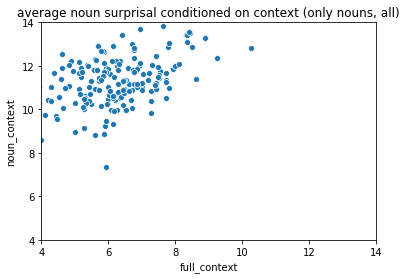

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=plot_df, x="full_context", y="noun_context")
plt.title("average noun surprisal conditioned on context (only nouns, all)")
plt.xlim((4,14))
plt.ylim((4,14))
plt.show()

In [39]:
plot_df2 = plot_df.agg({"noun_context": ["mean","sem"], "full_context": ["mean","sem"]})
df2_transposed = plot_df2.T
df2_transposed = df2_transposed.reset_index()
df2_transposed

,index,mean,sem
0,noun_context,11.287305,0.085580
1,full_context,6.245551,0.089295


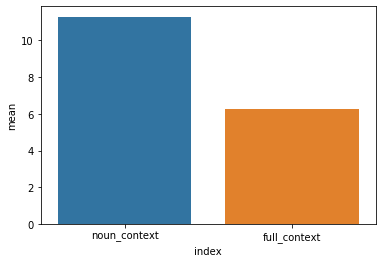

In [45]:
sns.barplot(x="index", y="mean", data=df2_transposed)
plt.show()

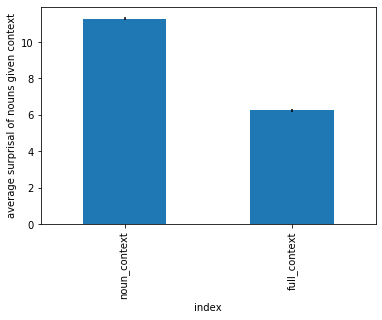

In [48]:
def errplot(data, x, y, yerr):
    ax = plt.gca()
    data.plot(x=x, y=y, yerr=yerr, kind="bar", ax=ax, legend=False)
    plt.ylabel("average surprisal of nouns given context")

errplot(df2_transposed,"index", "mean", "sem")

# All in one!

In [49]:
def main(textfile_original, textfile_nouns, textfile2):
    original_df = prepare_datasets(textfile_original)
    noun_df = prepare_datasets(textfile2)

    avg_surp_nouns, avg_surp_full = get_avg_surprisal_lists(original_df, noun_df)
    return avg_surp_nouns, avg_surp_full

In [ ]:
avg_surp_nounsverbs, avg_surp_full = main('token_surprisals_sentence_file_Original_bypassages.txt',
                                    'token_surprisals_sentence_file_nounsverbs_bypassages.txt')